In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from simulator import Simulation

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
def plot_distribution(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df['token_amount'].plot(kind='bar', width=1, ax=ax)
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("Tokens")
    fig.show()
    
    
def plot_alignment(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df.plot(kind='scatter', x='rating', y='token_amount', ax=ax)
    ax.set_ylabel("Tokens")
    ax.set_xlabel("Impact")
    ax.set_xticks([])    
    fig.show()
    
    
def analyze_simulation(results):
    print(pd.Series(results).iloc[:-1].apply(lambda x: int(x) if isinstance(x, float) else x))
    data = results['data']
    project_df = pd.DataFrame(data).sort_values(by='token_amount', ascending=False)
    plot_distribution(project_df)    
    plot_alignment(project_df)

# Base Model

In [3]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1500,
    normalize=True
)

scoring_method               median
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       489
avg_payout                    61291
median_payout                 32527
max_payout                   398288
dtype: object


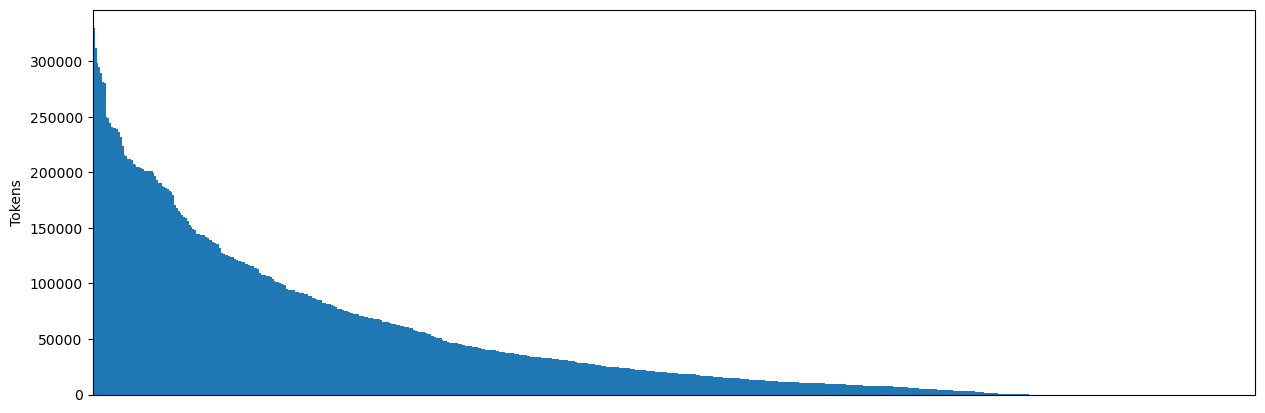

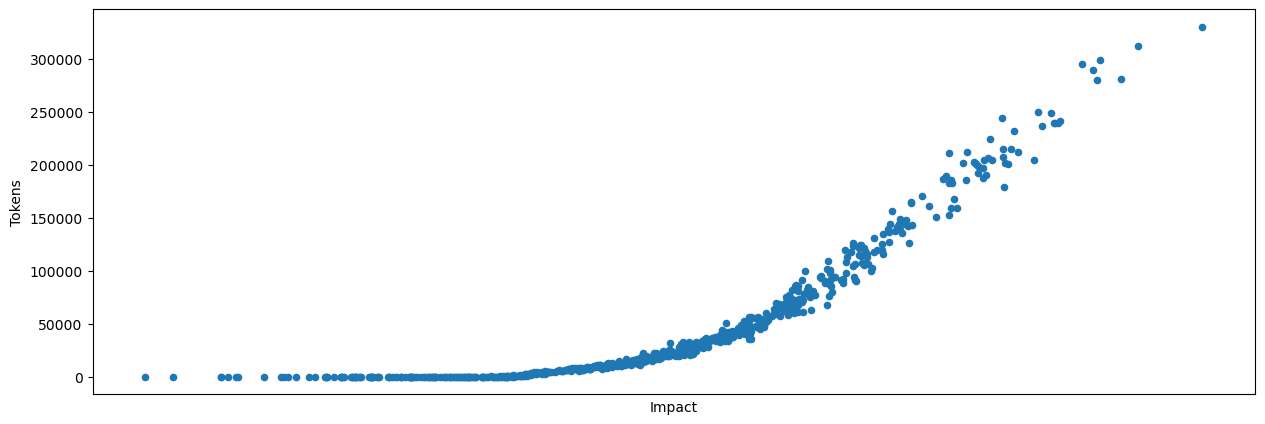

In [4]:
analyze_simulation(results)

## 1. What is the impact if a badgeholder deploys all of the 30M vs less than 30M?

In [5]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=0.5, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1500,
    normalize=True
)

scoring_method               median
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       447
avg_payout                    67085
median_payout                 36537
max_payout                   415940
dtype: object


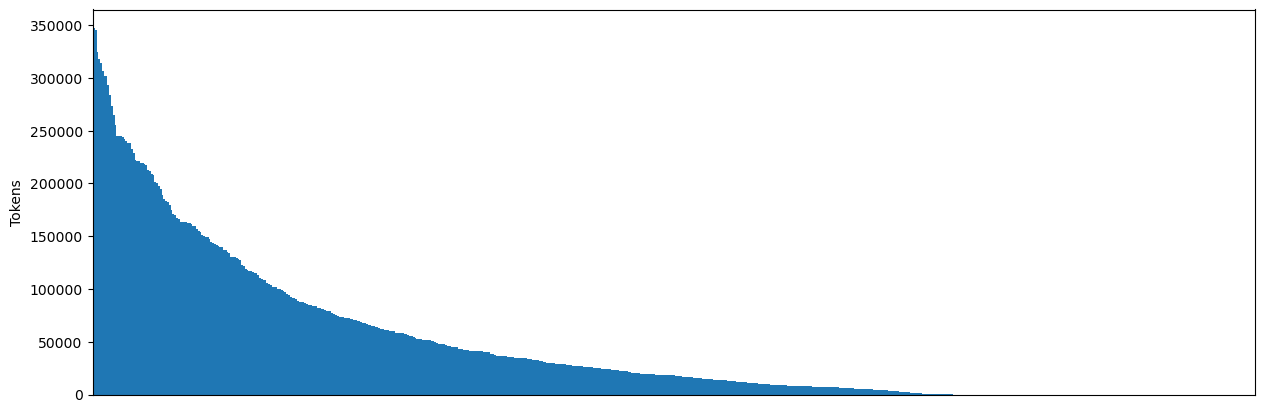

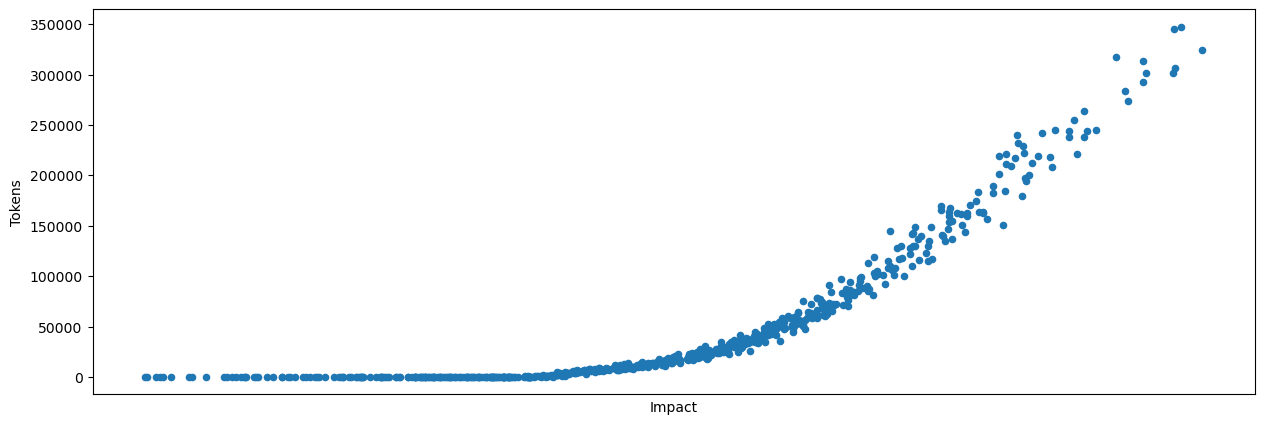

In [6]:
analyze_simulation(results)

## Q2: Does the number of projects reviewed affect the outcome?

scoring_method               median
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       610
avg_payout                    49108
median_payout                 39392
max_payout                   236115
dtype: object


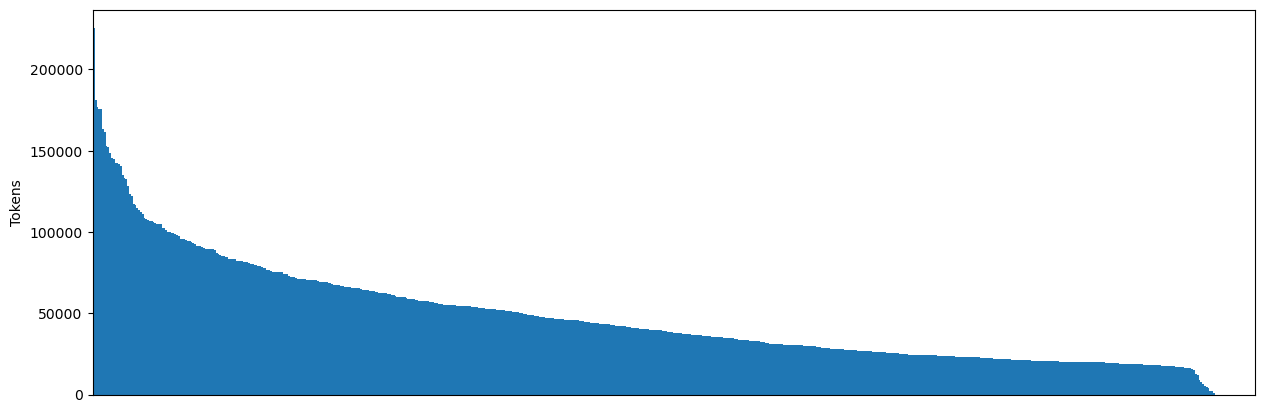

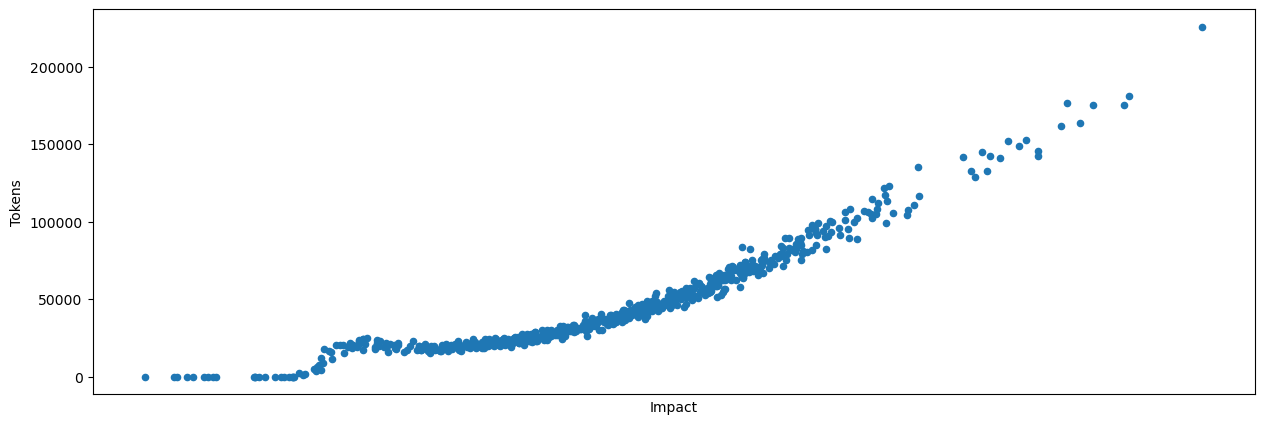

In [7]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.1, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

<Axes: xlabel='num_votes', ylabel='token_amount'>

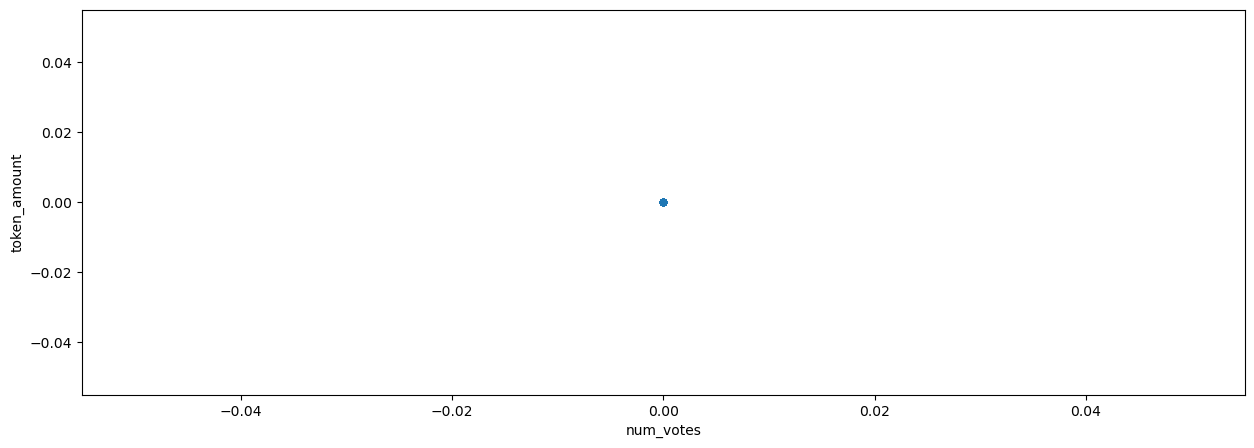

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
df = pd.DataFrame(simulation.get_project_data())
df[df['rating'].between(4,5)].plot(kind='scatter', x='num_votes', y='token_amount', ax=ax)

## Q3. What is the impact of a 1,500 OP minimum?

scoring_method               median
vote_quorum                      17
min_amount                        1
normalize                      True
num_projects_above_quorum       475
avg_payout                    63053
median_payout                 33549
max_payout                   422337
dtype: object


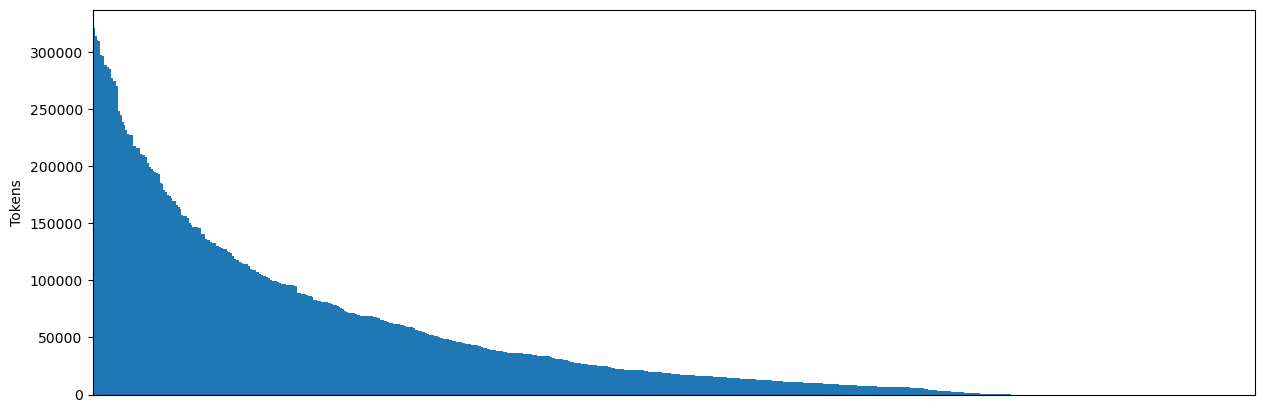

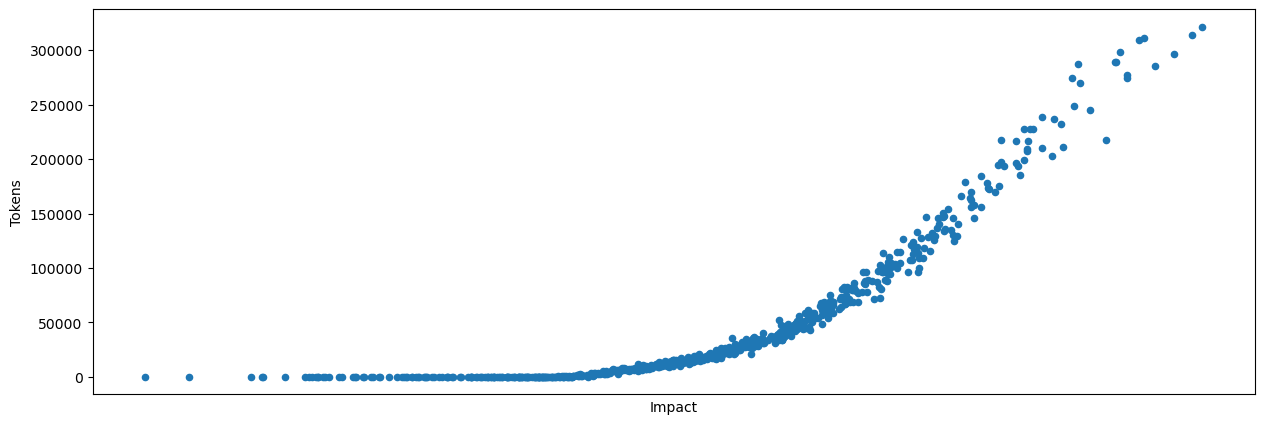

In [9]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1,
    normalize=True
)
analyze_simulation(results)

## Q4. What if we use the mean or QF formula?

scoring_method                 mean
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       482
avg_payout                    62244
median_payout                 38201
max_payout                   419805
dtype: object


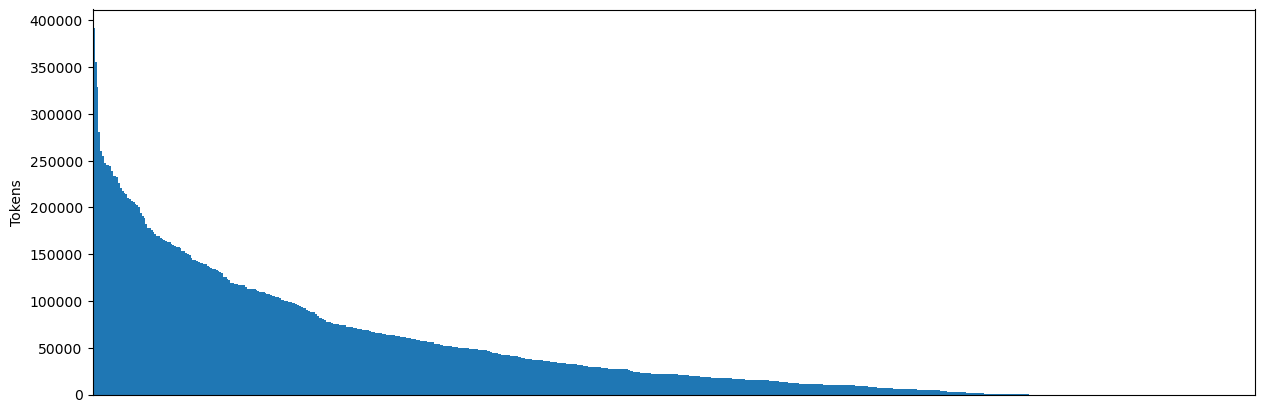

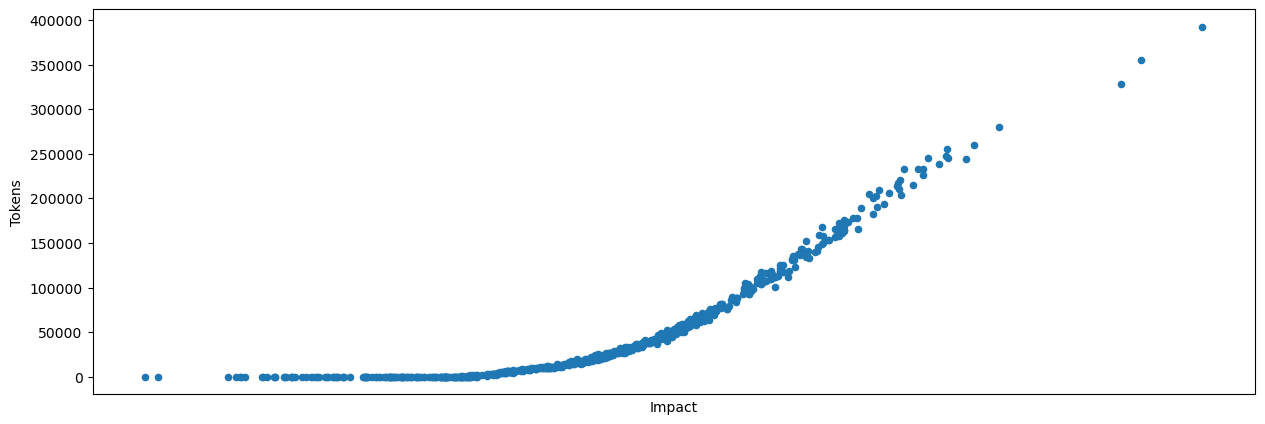

In [10]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='mean',
    quorum=17,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

scoring_method               quadratic
vote_quorum                         17
min_amount                        1500
normalize                         True
num_projects_above_quorum          473
avg_payout                       63401
median_payout                    44203
max_payout                      289416
dtype: object


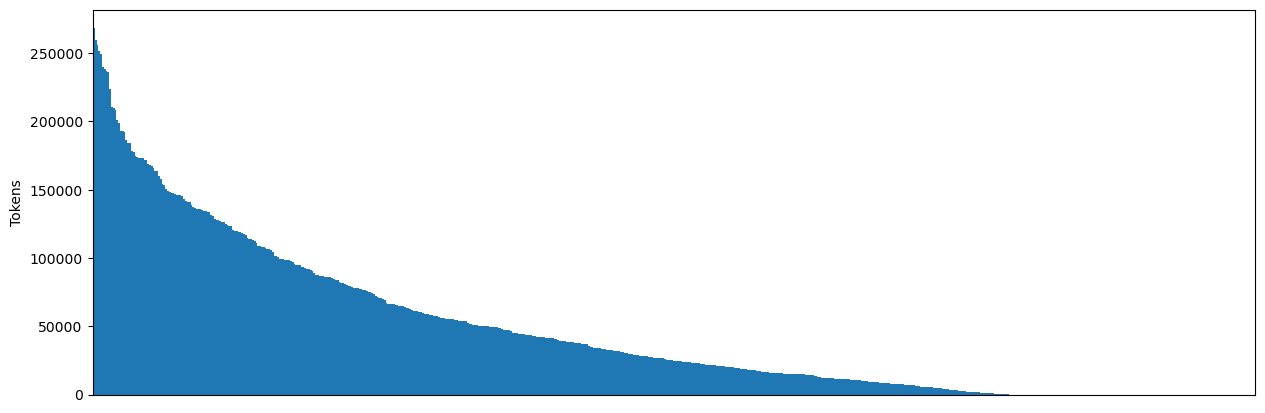

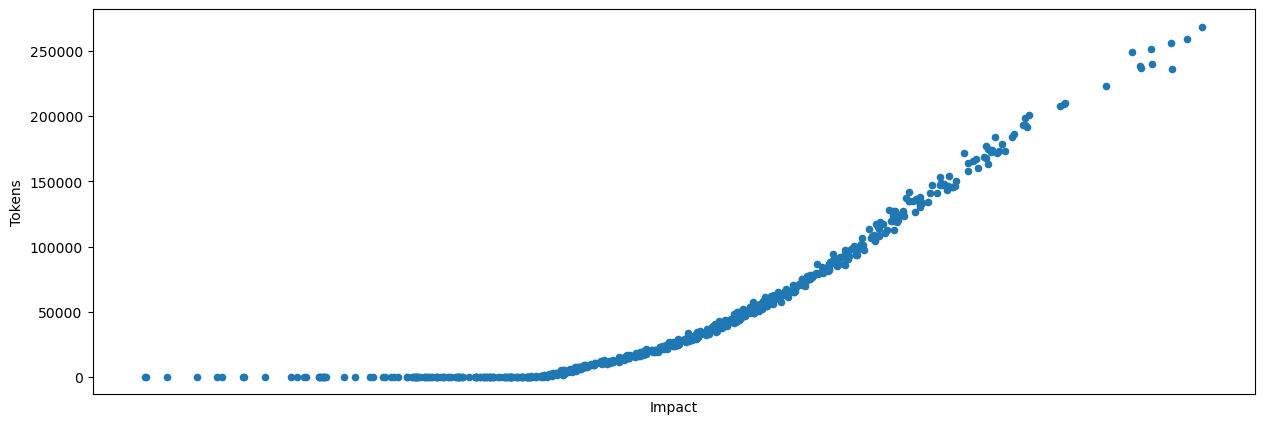

In [11]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='quadratic',
    quorum=17,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

## Q5. What is the impact of a higher quorum?

scoring_method               median
vote_quorum                      34
min_amount                     1500
normalize                      True
num_projects_above_quorum       362
avg_payout                    82818
median_payout                 54252
max_payout                   420441
dtype: object


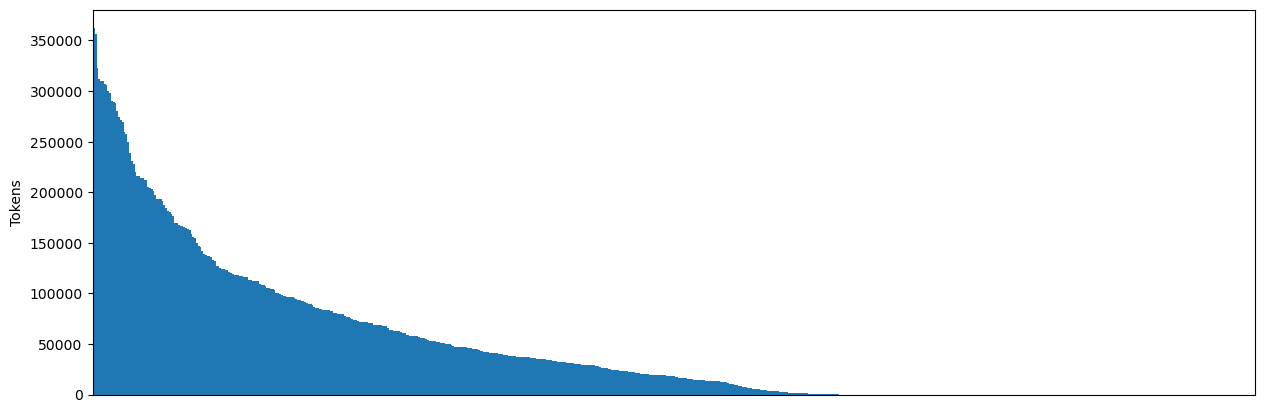

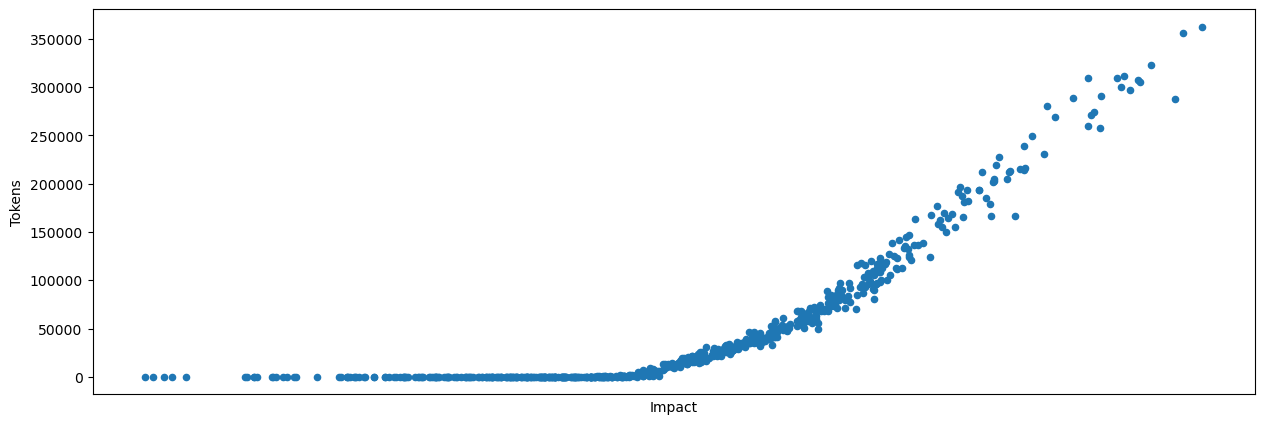

In [12]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=34,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

## Q6 What's the impact of zero votes on different types of projects?

In [13]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)
simulation.simulate_voting()

In [14]:
simulation.allocate_votes(scoring_method='median')

cases = [15,25,55,75]
results = {}
for p in simulation.round.projects:
    n = p.num_votes
    if n in results or n not in cases:
        continue
    results[n] = {
        'project': p,
        'base_tokens': p.token_amount
    }

for z in range(0,10):
    for case in cases:
        results[case]['project'].add_zeroes(1)
        simulation.allocate_votes(scoring_method='median')
        results[case].update({z:results[case]['project'].token_amount})        

,base_tokens,0,1,2,3,4,5,6,7,8,9
15,3074.16,2892.45,2711.42,2008.13,1304.23,1241.65,1179.17,1076.75,974.67,966.27,957.33
25,5994.25,5202.52,4411.73,4333.85,4255.32,3969.32,3683.63,3393.43,3104.31,2860.96,2615.91
55,56113.41,51352.45,46592.77,46536.17,46480.16,43475.44,40469.5,36167.94,31875.18,31436.69,30984.94
75,136266.54,134300.54,132333.53,129961.41,127588.78,125276.31,122962.95,110508.61,98039.95,97967.56,97895.16


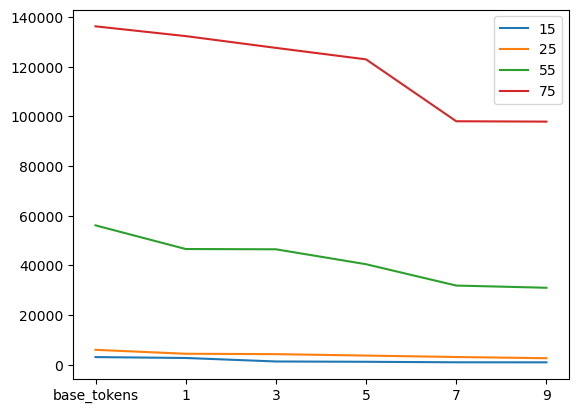

In [15]:
analysis = pd.DataFrame(results)
analysis = analysis.iloc[1:,:].T
analysis.sort_index(inplace=True)
analysis.T.plot(kind='line')
analysis